Mean Absolute Error: 979679.6912959907
Mean Squared Error: 1771751116594.04
R-squared: 0.6494754192267793
Accuracy: 64.94754192267793


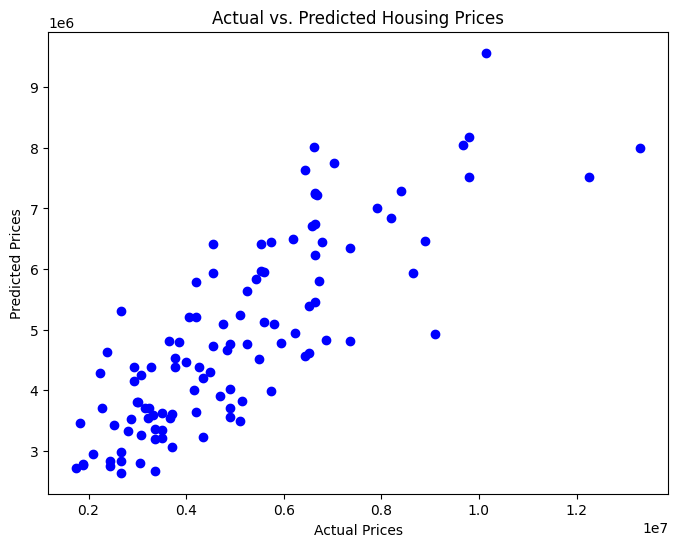

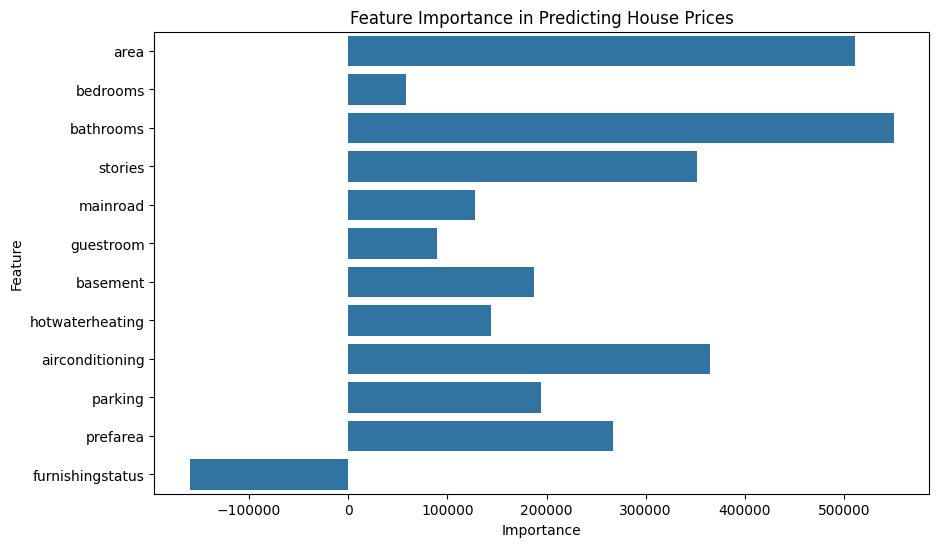

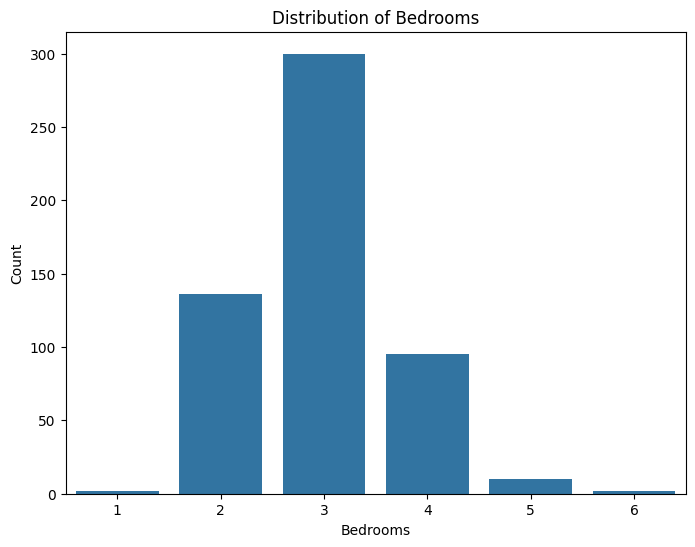

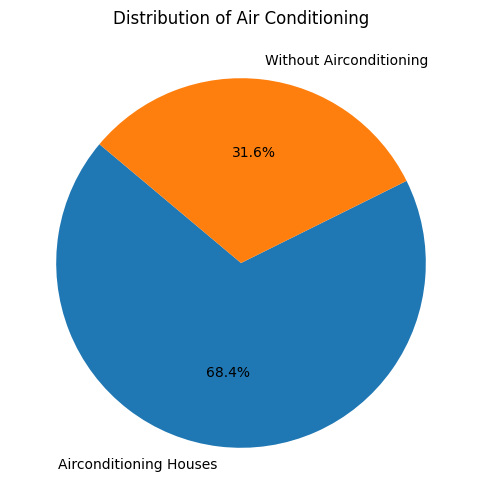

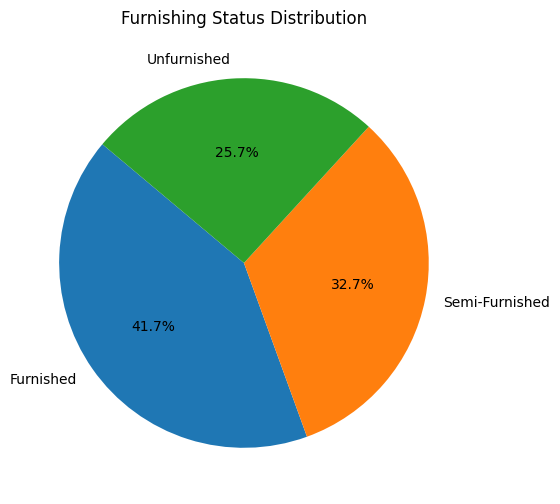

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('/Housing.csv')

#df.head();
#df.describe();
#df.info();
#df.isnull().sum();
#df.duplicated().sum();

# LabelEncoder for categorical feature
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split data into x and y
X = df.drop('price', axis=1) # Features: all except 'price'
y = df['price'] # Target

# Scale features to normalize values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)  # MAE: Average error
mse = mean_squared_error(y_test, y_pred)   # MSE: Squared error
r2 = r2_score(y_test, y_pred)              # How well the model fits.

# Print the matrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Accuracy= r2*100  #Accuracy in percentage
print(f'Accuracy: {Accuracy}')


# Visualizations

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.show()

# Bar plot of Feature importance
features = df.drop('price', axis=1).columns
importance = model.coef_  # Coefficients from the linear regression model
plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance in Predicting House Prices')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Bar plot of bedroom distributions
bedrooms= df.bedrooms.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=bedrooms.index, y=bedrooms.values)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# Pie chart of Distribution of Air Conditioning
airconditioning_counts = df['airconditioning'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(airconditioning_counts, labels=['Airconditioning Houses', 'Without Airconditioning'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Air Conditioning')
plt.show()


# Pie chart of distribution of house furnishing status
furnishing_status = df['furnishingstatus'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(furnishing_status, labels=['Furnished', 'Semi-Furnished', 'Unfurnished'], autopct='%1.1f%%', startangle=140)
plt.title('Furnishing Status Distribution')
plt.show()

